In [2]:
import requests 
from bs4 import BeautifulSoup as BS
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url="https://en.wikipedia.org/wiki/Forest_cover_by_state_in_India"
response=requests.get(url)
content=response.content

In [4]:
soup=BS(content,'html.parser')
soup.title

<title>Forest cover by state in India - Wikipedia</title>

In [5]:
tables=soup.find_all('table', class_='wikitable')

In [6]:
table=tables[1]
table

<table class="wikitable sortable" style="text-align: right;">
<tbody><tr>
<th>State / UT
</th>
<th>Zone</th>
<th>Geographical Area</th>
<th>Very dense</th>
<th>Moderately dense</th>
<th>Open forest</th>
<th>Total forest area</th>
<th>% of the forested area</th>
<th>% change since 2019
</th></tr>
<tr>
<td style="text-align: center;"><a href="/wiki/Andhra_Pradesh" title="Andhra Pradesh">Andhra Pradesh</a>
</td>
<td>Southern</td>
<td>162,968</td>
<td>1,994</td>
<td>13,929</td>
<td>13,861</td>
<td>29,784</td>
<td>18.28%</td>
<td>2.22%
</td></tr>
<tr>
<td style="text-align: center;"><a href="/wiki/Arunachal_Pradesh" title="Arunachal Pradesh">Arunachal Pradesh</a>
</td>
<td>North Eastern</td>
<td>83,743</td>
<td>21,058</td>
<td>30,176</td>
<td>15,197</td>
<td>66,431</td>
<td>79.33%</td>
<td>-0.39%
</td></tr>
<tr>
<td style="text-align: center;"><a href="/wiki/Assam" title="Assam">Assam</a>
</td>
<td>North Eastern</td>
<td>78,438</td>
<td>3,017</td>
<td>9,991</td>
<td>15,304</td>
<td>28,312</

In [7]:
if table:
    state_list = []
    zone_list=[]
    geo_area=[]
    very_dense_list=[]
    mod_dense_list=[]
    open_forest_list=[]
    total_forest_area_list=[]
    percent_forest_list=[]
    percent_change_list=[]

    for row in table.find_all('tr')[1:]:
        columns = row.find_all('td')
        if len(columns) >= 9:
            state = columns[0].get_text(strip=True)
            zone= columns[1].get_text(strip=True)
            geo=columns[2].get_text(strip=True)
            very_dense=columns[3].get_text(strip=True)
            mod_dense=columns[4].get_text(strip=True)
            open_forest=columns[5].get_text(strip=True)
            total_area=columns[6].get_text(strip=True)
            per_forest=columns[7].get_text(strip=True)
            per_change = columns[8].get_text(strip=True)

            state_list.append(state)
            zone_list.append(zone)
            geo_area.append(geo)
            very_dense_list.append(very_dense)
            mod_dense_list.append(mod_dense)
            open_forest_list.append(open_forest)
            total_forest_area_list.append(total_area)
            percent_forest_list.append(per_forest)
            percent_change_list.append(per_change)

    data = {
        'State': state_list,
        'Zone':zone_list,
        'Geo_area':geo_area,
        'Very_dense':very_dense_list,
        'Moderate_dense':mod_dense_list,
        'Open_forest':open_forest_list,
        'Total_Forest_Area':total_forest_area_list,
        'Percent Forest':percent_forest_list,
        'Percent Change':percent_change_list
    }

    df = pd.DataFrame(data)

    # ... (code for plotting)
else:
    print("Table not found on the page.")

In [8]:
if table:
    state_list=[]
    area_list=[]

    for row in table.find_all('tr')[1:]:
        columns=row.find_all('td')
        if len(columns)>=2:
            state=columns[0].get_text(strip=True)
            area=columns[6].get_text(strip=True)

            state_list.append(state)
            area_list.append(area)

    data= {
        'State':state_list,
        'Area':area_list

    }

    df=pd.DataFrame(data)


In [9]:
df.head()

,State,Area
0,Andhra Pradesh,"29,784"
1,Arunachal Pradesh,"66,431"
2,Assam,"28,312"
3,Bihar,"7,381"
4,Chhattisgarh,"55,717"


In [12]:
df


,State,Area
0,Andhra Pradesh,"29,784"
1,Arunachal Pradesh,"66,431"
2,Assam,"28,312"
3,Bihar,"7,381"
4,Chhattisgarh,"55,717"
5,Delhi,195
6,Goa,"2,244"
7,Gujarat,"14,926"
8,Haryana,"1,603"
9,Himachal Pradesh,"15,443"


In [13]:
df['Area']=df['Area'].str.replace(',','')

In [14]:
df['Area'] = df['Area'].astype(float)


Text(0, 0.5, 'Area')

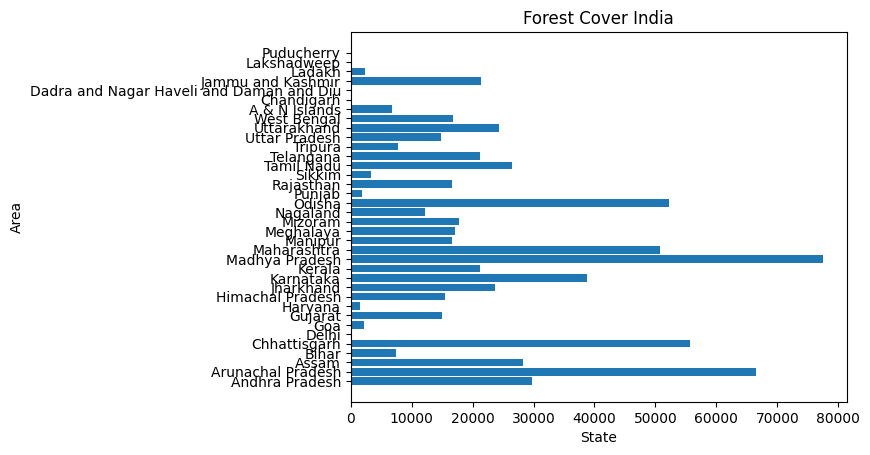

In [19]:
x=df["Area"]
y=df["State"]
plt.barh(y,x)

plt.title("Forest Cover India")
plt.xlabel("State")
plt.ylabel("Area")



([<matplotlib.patches.Wedge at 0x1fbcd2f1c90>,
 [Text(1.0905622890631166, 0.1437841913195457, 'Andhra Pradesh'),
  Text(0.9351465250893337, 0.5792244613389047, 'Arunachal Pradesh'),
  Text(0.6204227375816208, 0.9083367363988574, 'Assam'),
  Text(0.4706736084773036, 0.9942164524302312, 'Bihar'),
  Text(0.18006878144137478, 1.0851613861312144, 'Chhattisgarh'),
  Text(-0.0897107956174016, 1.0963357027615643, 'Delhi'),
  Text(-0.10147428656429154, 1.0953095312131034, 'Goa'),
  Text(-0.18387861444932765, 1.0845223165745348, 'Gujarat'),
  Text(-0.2622205020803165, 1.0682885416818562, 'Haryana'),
  Text(-0.3415554035242764, 1.0456289525081872, 'Himachal Pradesh'),
  Text(-0.5158398477633402, 0.9715499222682765, 'Jharkhand'),
  Text(-0.7601713154976397, 0.7950720540269216, 'Karnataka'),
  Text(-0.9413051509100964, 0.5691613241165645, 'Kerala'),
  Text(-1.093445237834079, 0.1199062627971303, 'Madhya Pradesh'),
  Text(-0.9878824734637108, -0.483826641084615, 'Maharashtra'),
  Text(-0.80331706800

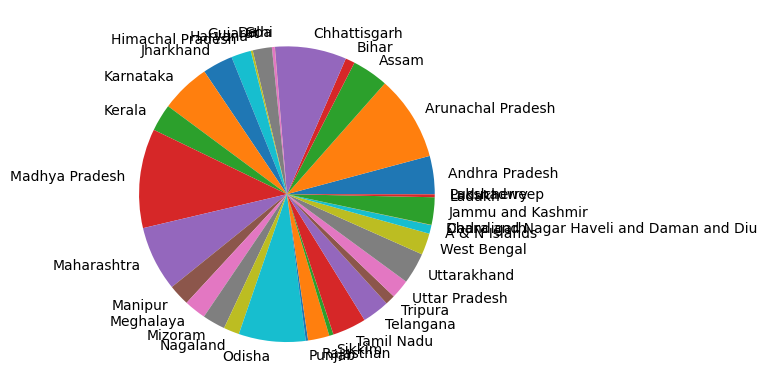

In [18]:
plt.pie(x,labels=y)